# Part I - FordGoBike-trip Dataset
## by Souki Aya

## Introduction

The chosen dataset, FordGoBike, contains informations about the trajectories of individual trip by bycicle in the bay of San Fransisco in 2019. It features information about the user, the bike, the trajectory, and the time of the trip. My purpose here is to find eventually the correlation of the characteristics (age, sex, and user_type) of the riders with the nature of the trip (trajectory,etc).
Thus, I'm seeking to answer the following questions: 

1- What are the stations where most trips happen?

3- What is the distribution of the characteristics of the user (age, gender,..)?

2-in what way the change in user chareacteristics (age, gender, user type) could potentially influence the nature of the trip (start station, time of the day,..)?

## Preliminary Wrangling


# import all packages and set plots to be embedded inline


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Let's load our dataset and explore its columns.

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [3]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

### What is the structure of your dataset?

This dataset contains 183412 trips with 16 features.

In this dataset, we notice that the time variables in this dataset are all string, so they need to be converted to datetime format.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out when and where most trips using bikes take place.

Also, I am interested in the characteristics (age, sex, and user_type) of the riders, and eventually the correlation of these characteristics with the nature of the trip (trajectory,etc).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that would help support my investigation are the duration of the trip, start and end time, start and end stations id, type of the user and their age (that can be deduced from 'member_birth_year'), as well as their gender. Those features would allow us to find the correlation between characteristics of the users and nature of the trip.


## Univariate Exploration


In [4]:
print(df.shape)
print(df.info())
print(df.head(10))

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None
   

Let's convert the formats of 'start_time' and 'end_time'.

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### Column 'start-time'

We'll try to visualize the number of trips per months. For that, we'll create a column featuring the month.

In [7]:
df['start_month']=pd.DatetimeIndex(df['start_time']).month

In [8]:
def plotbar(data,xax,xlabel,ylabel,title):
    base_color = sb.color_palette()[0]
    sb.countplot(data=df, x=xax, color=base_color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    

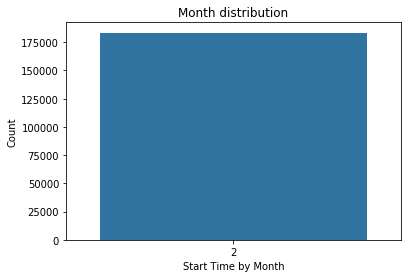

In [9]:
plotbar(df,'start_month','Start Time by Month','Count','Month distribution')

The dataset feature trips in february 2019 only. We'll try then to visualize the nuber of trips depending on the days.

In [11]:
df['start_day']=pd.DatetimeIndex(df['start_time']).day

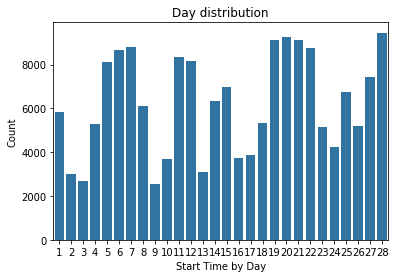

In [48]:
plotbar(df,'start_day','Start Time by Day','Count','Day distribution')

We cant deduce much from this distribution as most trips don't necessarily take place in weekends and holidays, as seen from the calender:

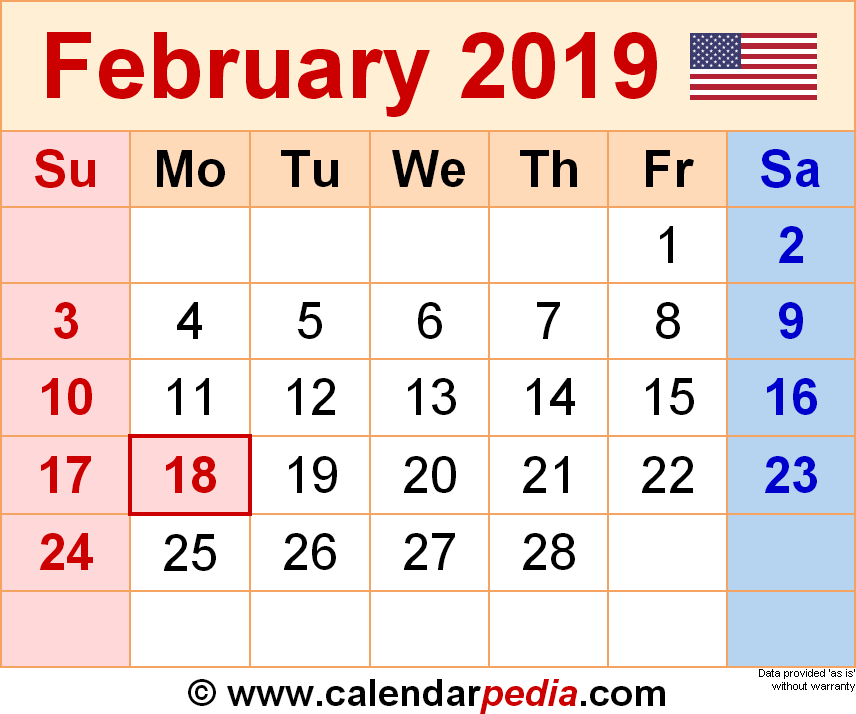

Let's look at the distribution of the trips depending on the time of the day. For that, we'll create a new column:

In [13]:
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


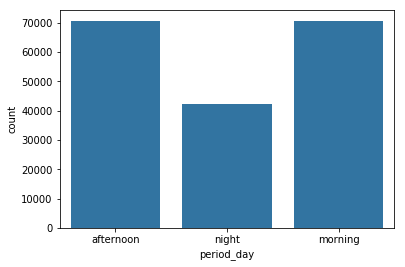

In [14]:
sb.countplot(data = df, x = 'period_day', color = base_color)

We notice that the number of trips is lower signifantly at night compared with either morning or afternoon, which is to be expected.

### 'Duration':

We move on to the duration. We'll opt for a box chart to visualize this column.

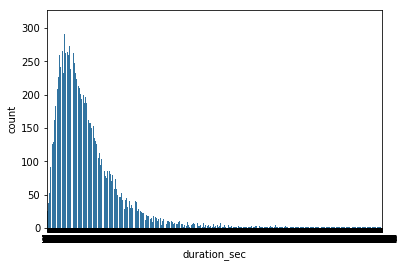

In [15]:
sb.countplot(data=df,x=df['duration_sec'],color=base_color)

The plot is not really interpretable so we'll have to convert seconds to minutes for better distinction.

In [16]:
df['duration_min']=df['duration_sec']/60

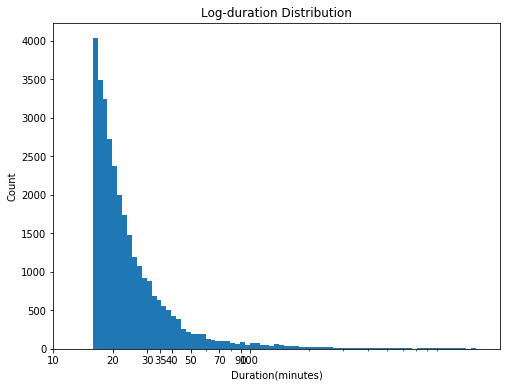

In [17]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Duration(minutes)')
plt.ylabel('Count')
plt.title('Log-duration Distribution');

We notice here that most trips last less than 30 minutes.

### 'age':

we can deduce the age from the birth year by substracting member-birth-year from 2019

In [18]:
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

we'll then round the values so that the colomn would only have integer values:

In [19]:
df['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

I'm a bit skeptical as for the value of the oldest peson. Let's use a boxplot to outline the outliers.

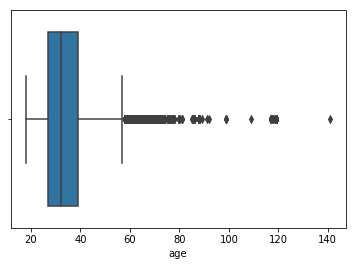

In [20]:
sb.boxplot(x=df['age'])

According to Google,'The oldest living person in the world whose age has been validated is 118-year-old Lucile Randon'. That said, we'll have to drop the rows who have an age value superior to 110:

In [21]:
df.drop(df[df['age']>110].index,inplace=True)

Let's drop the rows with null age values next:

In [22]:
df.drop(df[df['age'].isnull()].index,inplace=True)

In [23]:
df['age']=df['age'].astype(int)

Let's now visualize the column 'age':

In [24]:
bins=np.arange(15,100,10)
s=pd.cut(df['age'],bins)

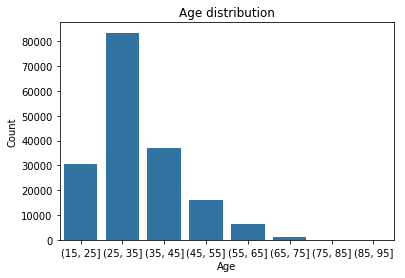

In [50]:
plotbar(df,s,'Age','Count','Age distribution')

We notice that most riders are people whose age vary between 25 et 35.

### Member gender:

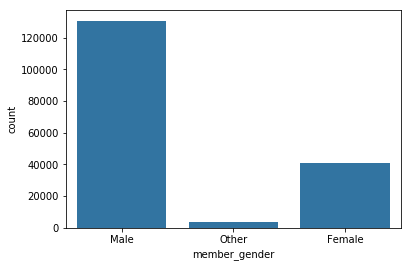

In [26]:
sb.countplot(data=df, x=df['member_gender'],color=base_color)

We notice here that the number of males is more than twice higher than the number of females.

### User type:

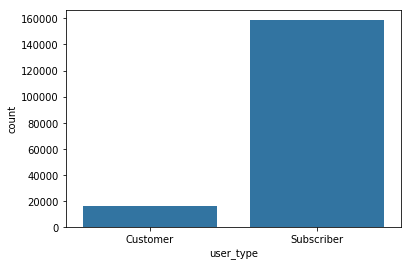

In [27]:
sb.countplot(data=df, x=df['user_type'],color=base_color)

We notice that the number of sucscribers is nearly 8 times the number of customers.

### Start station:

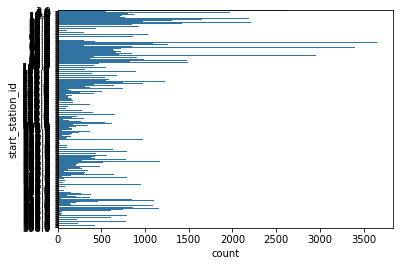

In [28]:
sb.countplot(data=df, y=df['start_station_id'],color=base_color)

So that our plot can be interpretable, we'll just pick the ten stations with the most and counts.

In [29]:
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3406
Berry St at 4th St                                                 2952
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2572
San Francisco Ferry Building (Harry Bridges Plaza)                 2540
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

In [30]:
locs=["Market St at 10th St","San Francisco Caltrain Station 2  (Townsend St at 4th St)","Berry St at 4th St","Montgomery St BART Station (Market St at 2nd St)","Powell St BART Station (Market St at 4th St)","San Francisco Caltrain (Townsend St at 4th St)","San Francisco Ferry Building (Harry Bridges Plaza)","Howard St at Beale St",
"Steuart St at Market St","Powell St BART Station (Market St at 5th St)"]
df_top10 = df.loc[df['start_station_name'].isin(locs)]

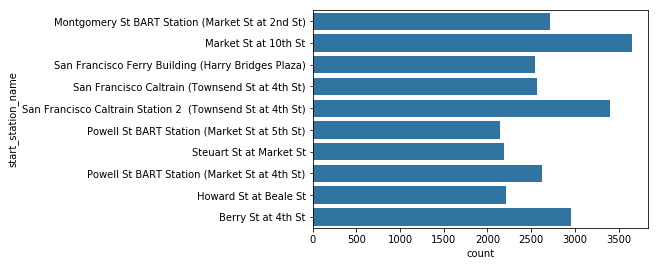

In [31]:
sb.countplot(data=df_top10,y=df_top10['start_station_name'],color=base_color)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 We notice, after visualizing our data, the following:
 
1-the number of trips is lower signifantly at night compared with either morning or afternoon.
    
2- most trips last less than 30 minutes. Here, I had to use the log for a better interpretation of the plot.
    
3- most riders are people whose age vary between 25 et 35. 
    
4- the number of males is more than twice higher than the number of females.
   
5- the number of sucscribers is nearly 8 times the number of customers.
    
6- The top 10 stations are mainly close to public transportations such as BART and Caltrain.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to convert the time columns from objects to datetime. Furthermore, I had to create the age column and remove the outliers in it.

## Bivariate Exploration


### Relationship between age and trip duration:

To visualize such relationshipe, we'll use a heat map:

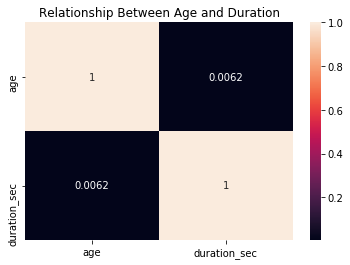

In [32]:
sb.heatmap(df[['age','duration_sec']].corr(), annot = True)
plt.title('Relationship Between Age and Duration');

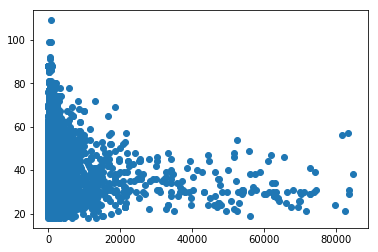

In [33]:
plt.scatter(x=df['duration_sec'],y=df['age'])

Age is very slightly positively correlated with duration, wich was against my intuition as I thought they are strongly correlated. Maybe this result is related to most of the population being between 25 and 35 years old.

### Relationship between time of the day and number of trips (top 10 stations):

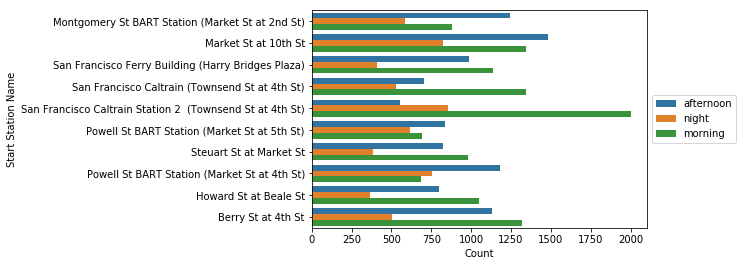

In [34]:
sb.countplot(data=df_top10, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

While trips from Caltrain station 2 pick up in the morning, this is obviously not the case for every station as the morning and afternoon trip counts are more or less close in number.

### Relationship between user type  and trip counts (for top 10 stations):

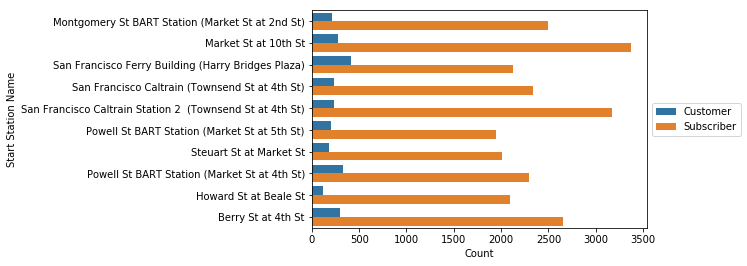

In [35]:
sb.countplot(data=df_top10, y='start_station_name', hue='user_type')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

### Relationship between gender  and trip counts (for top 10 stations):

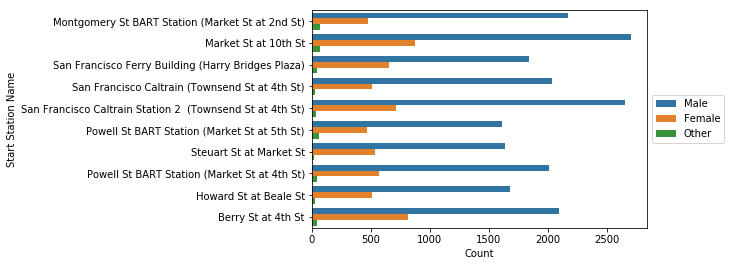

In [36]:
sb.countplot(data=df_top10, y='start_station_name', hue='member_gender')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1-Age is very slightly positively correlated with duration, wich was against my intuition as I thought they are strongly correlated. Maybe this result is related to most of the population being between 25 and 35 years old.

2-While trips from Caltrain station 2 pick up in the morning, this is obviously not the case for every station as the morning and afternoon trip counts are more or less close in number. Further investigation is needed.

3- No obvious correlation is deduced between stations and gender percentage. Further investigation is needed.

4- Subscribers' numbers is higher than customers' in every station. There are more customers in Berry St at 4th st and Market st at 10th st.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

As what I've explored are mainly my features of interest, I did not notice any interesting relationships between the other features.

## Multivariate Exploration


### Top 10 trip station by time of the days per gender:

In [37]:
df_fe = df_top10.query('member_gender == "Female"')
df_ma = df_top10.query('member_gender == "Male"')

Text(0,0.5,'Start Station Name')

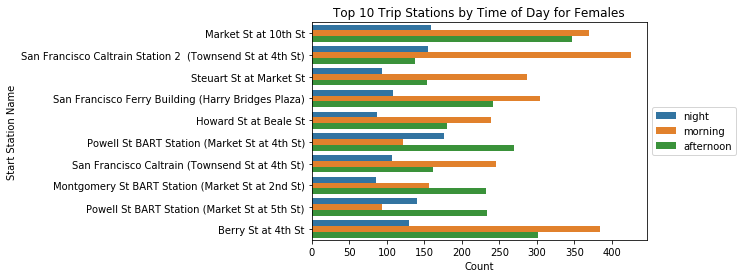

In [38]:
sb.countplot(data=df_fe, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day for Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

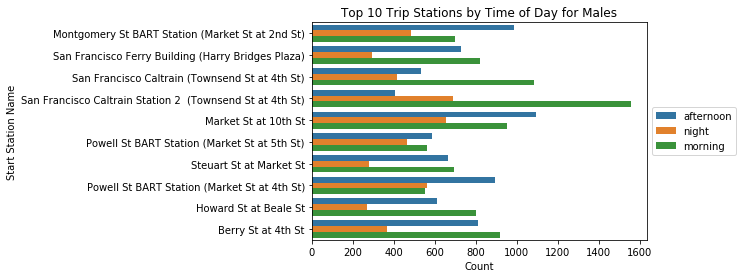

In [39]:
sb.countplot(data=df_ma, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day for Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

### Top 10 trip station by time of the days per user type:

In [40]:
df_cus = df_top10.query('user_type == "Customer"')
df_sub = df_top10.query('user_type == "Subscriber"')

Text(0,0.5,'Start Station Name')

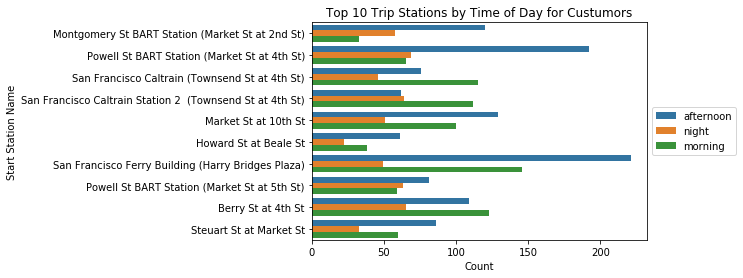

In [41]:
sb.countplot(data=df_cus, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day for Custumors')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

Text(0,0.5,'Start Station Name')

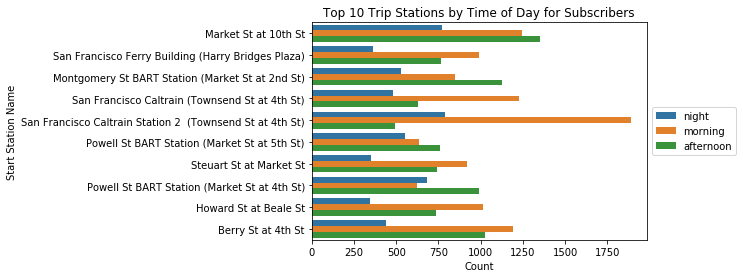

In [42]:
sb.countplot(data=df_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day for Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

### Age distribution in top 10 trip station by time of the days :

In [43]:
df_m = df_top10.query('period_day == "morning"')
df_a = df_top10.query('period_day == "afternoon"')
df_n = df_top10.query('period_day == "night"')

Text(0,0.5,'Start Station Name')

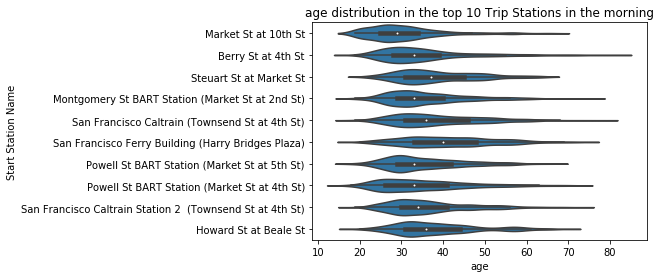

In [44]:
sb.violinplot(data=df_m, y='start_station_name', x='age',color=base_color)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('age distribution in the top 10 Trip Stations in the morning')
plt.xlabel('age')
plt.ylabel('Start Station Name')

Text(0,0.5,'Start Station Name')

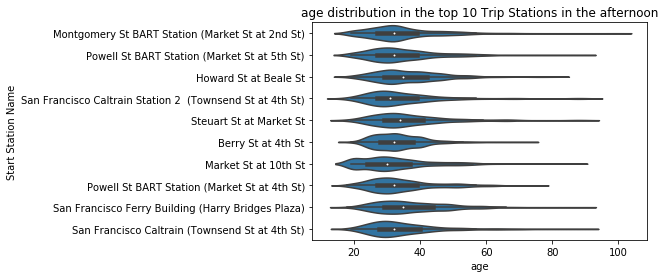

In [45]:
sb.violinplot(data=df_a, y='start_station_name', x='age',color=base_color)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('age distribution in the top 10 Trip Stations in the afternoon')
plt.xlabel('age')
plt.ylabel('Start Station Name')

Text(0,0.5,'Start Station Name')

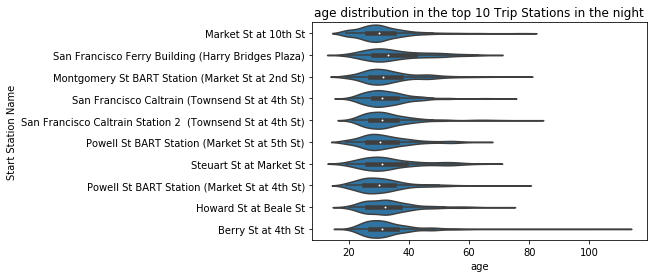

In [46]:
sb.violinplot(data=df_n, y='start_station_name', x='age',color=base_color)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('age distribution in the top 10 Trip Stations in the night')
plt.xlabel('age')
plt.ylabel('Start Station Name')

In [47]:
df_top10.to_csv('ford_go_bike_2019.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I think that dividing users into customers and subscribers denoted the difference between the two. While the number of trips of tend to pick up near tourist attractions (like Ferry Building per example, which has the highest number of trips), subscribers's trips are higher in station with public transportation (Caltrain station per example).

### Were there any interesting or surprising interactions between features?

Seeing the age distribution, the station market st 10th st has more people on the younger side. I'd suggest it may be because of schools nearby the station.

## Conclusions

From the investigation, we learn the following:

- The number of trips is lower signifantly at night compared with either morning or afternoon. The morning and afternoon trip counts are more or less close in number. 

- most trips last less than 30 minutes. 

- most riders are people whose age vary between 25 et 35.

- the number of males is more than twice higher than the number of females.

- the number of sucscribers is signifantly higher than the number of customers.

- The top 10 stations are mainly close to public transportations such as BART and Caltrain.

- Age is very slightly positively correlated with duration. Maybe this result is related to most of the population being between 25 and 35 years old.

- While the number of trips of tend to pick up near tourist attractions (like Ferry Building per example, which has the highest number of trips), subscribers's trips are higher in station with public transportation (Caltrain station per example).

- Features that need more investigation: the difference in counts between males and females.